In [1]:
from qiskit import __version__
print(__version__)

1.3.2


## Deutsch's Algorithm

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

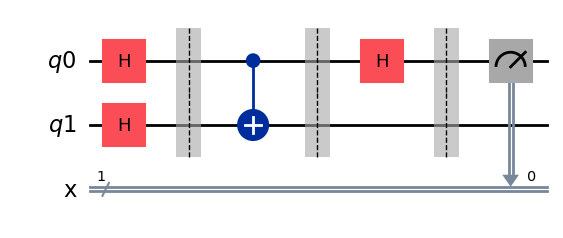

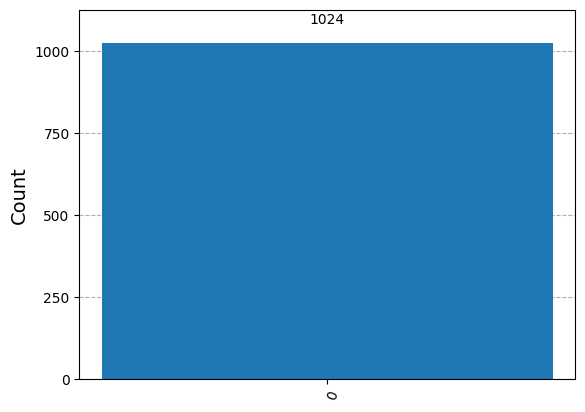

In [31]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector, Operator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

state = Statevector.from_label("10")

q0 = QuantumRegister(1, "q0")
q1 = QuantumRegister(1, "q1")
x = ClassicalRegister(1, "x")

circuit = QuantumCircuit(q0, q1, x)
circuit.h(q0)
circuit.h(q1)
circuit.barrier()

pi1 = Operator.from_circuit(circuit)
display(state.evolve(pi1).draw("latex"))

circuit.cx(q0, q1)
circuit.barrier()

pi2 = Operator.from_circuit(circuit)
display(state.evolve(pi2).draw("latex"))

circuit.h(q0)
circuit.barrier()

pi3 = Operator.from_circuit(circuit)
display(state.evolve(pi3).draw("latex"))

circuit.measure(q0, x)
display(circuit.draw(output="mpl"))

result = AerSimulator().run(circuit).result()
statistics = result.get_counts()
display(plot_histogram(statistics))